#### MNIST
#### DataLoader, Transformation
#### Multilayer Neural Net, activation function
#### Loss and Optimizer
#### Training Loop (batch training)
#### Model evaluation
#### GPU support


In [30]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [24]:
# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10 # 0-9
num_epochs = 2   
batch_size = 100
learning_rate = 0.001

In [31]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

<function matplotlib.pyplot.show(close=None, block=None)>

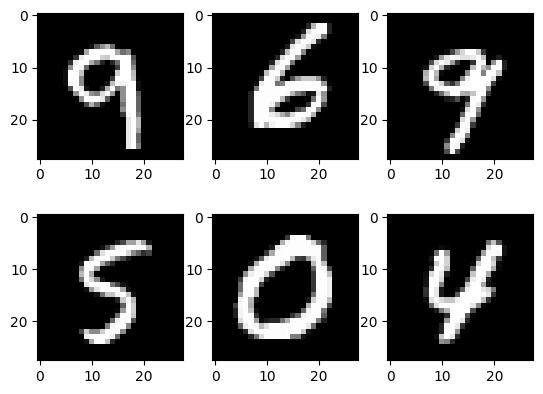

In [26]:
# check if the dataset it is ok
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show

In [35]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size).to(device) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes).to(device)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

In [36]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [37]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.4839
Epoch [1/2], Step [200/600], Loss: 0.2471
Epoch [1/2], Step [300/600], Loss: 0.3094
Epoch [1/2], Step [400/600], Loss: 0.2805
Epoch [1/2], Step [500/600], Loss: 0.1474
Epoch [1/2], Step [600/600], Loss: 0.1839
Epoch [2/2], Step [100/600], Loss: 0.3993
Epoch [2/2], Step [200/600], Loss: 0.2853
Epoch [2/2], Step [300/600], Loss: 0.1553
Epoch [2/2], Step [400/600], Loss: 0.0542
Epoch [2/2], Step [500/600], Loss: 0.1541
Epoch [2/2], Step [600/600], Loss: 0.1189


In [38]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

accuracy = 95.59


In [ ]:
: